**Health Insurance Linear Model**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


In [ ]:
df = pd.read_csv(r'insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Text(0.5, 1.0, 'Charges Vs BMI')

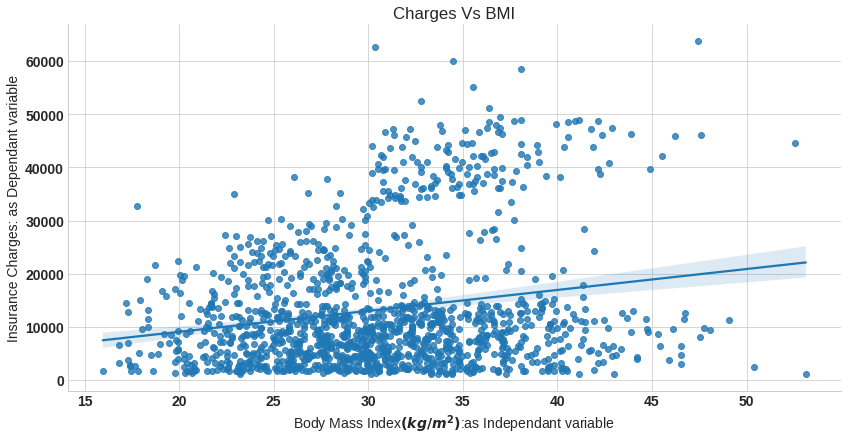

In [ ]:
sns.lmplot(x = 'bmi', y='charges', data=df, aspect=2, height=6)
plt.xlabel('Body Mass Index$(kg/m^2)$:as Independant variable')
plt.ylabel('Insurance Charges: as Dependant variable')
plt.title('Charges Vs BMI')


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Missing value in the dataset')

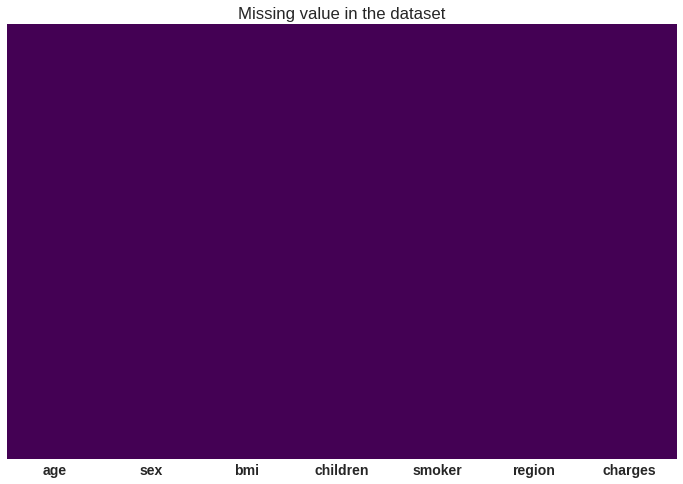

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing value in the dataset")


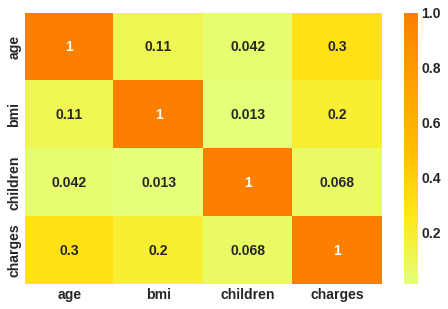

In [ ]:
corr = df.corr()
sns.heatmap(corr, cmap="Wistia", annot=True)


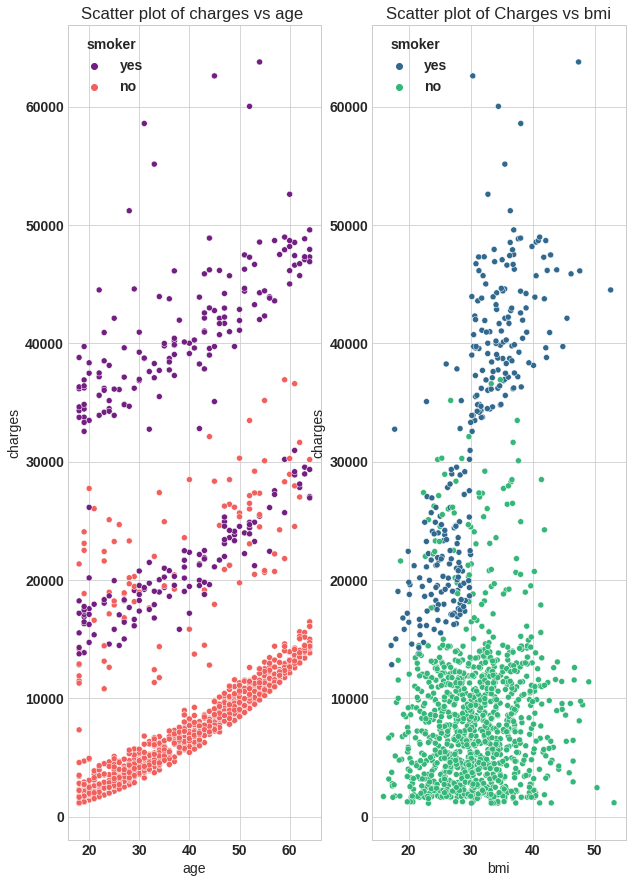

In [ ]:
f = plt.figure(figsize=(10, 15))
ax = f.add_subplot(121)
sns.scatterplot(x='age', y='charges', data=df, palette='magma', hue='smoker', ax=ax)
ax.set_title('Scatter plot of charges vs age ')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi', y='charges', data=df, palette='viridis', hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc png')


In [ ]:
#Dummy Variable
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df, prefix = 'ONE', prefix_sep='_',
                          
                          columns = categorical_columns,
                          drop_first = True,
                          dtype = 'int8')


In [ ]:
print('Columns in original data frame: \n', df.columns.values)
print('\nNumber of rows and columns in the dataset: ', df.shape)
print('\nColumns in data frame after encoding dummy variable: \n', df_encode.columns.values)
print('\nNumber of rows and columns in the dataset: ', df_encode.shape)


Columns in original data frame: 
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset:  (1338, 7)

Columns in data frame after encoding dummy variable: 
 ['age' 'bmi' 'charges' 'ONE_male' 'ONE_1' 'ONE_2' 'ONE_3' 'ONE_4' 'ONE_5'
 'ONE_yes' 'ONE_northwest' 'ONE_southeast' 'ONE_southwest']

Number of rows and columns in the dataset:  (1338, 13)


In [ ]:
from scipy.stats import boxcox
y_bc, lam, ci = boxcox(df_encode['charges'], alpha=0.05)

ci, lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [ ]:
df_encode['charges'] = np.log(df_encode['charges'])


In [ ]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


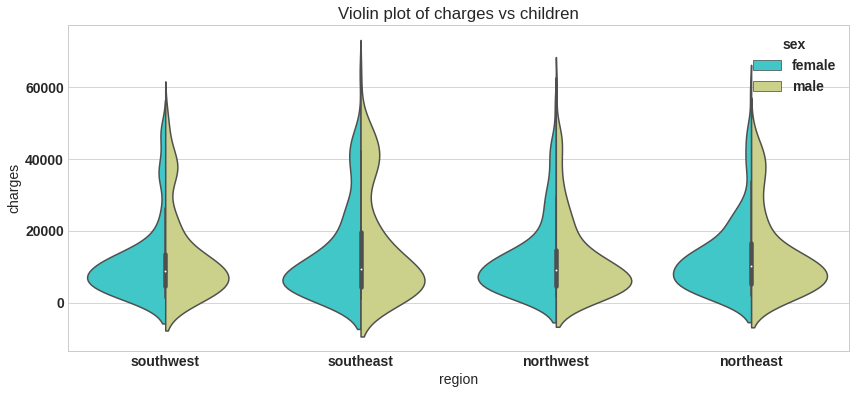

In [ ]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges',hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of charges vs children');

In [ ]:
df_encode['charges'] = np.log(df_encode['charges'])

In [ ]:
from sklearn.model_selection import train_test_split
x = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.3,random_state=23)


In [ ]:
x_train_0 = np.c_[np.ones((x_train.shape[0], 1)),x_train]
x_test_0 = np.c_[np.ones((x_test.shape[0], 1)),x_test]

# Step2: build model
theta = np.matmul(np.linalg.inv(np.matmul(x_train_0.T, x_train_0) ), np.matmul(x_train_0.T, y_train)) 


In [ ]:
parameter = ['theta_' +str(i) for i in range(x_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(x.columns.values)
parameter_df = pd.DataFrame({'Parameter': parameter, 'Columns ':columns, 'theta': theta})


Scikit Learning Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

sk_theta = [lin_reg.intercept_] +list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameters_df


,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,1.975190
1,theta_1,age,0.003844
2,theta_2,bmi,0.001351
3,theta_3,ONE_male,-0.008566
4,theta_4,ONE_1,0.019086
5,theta_5,ONE_2,0.033129
6,theta_6,ONE_3,0.029804
7,theta_7,ONE_4,0.061223
8,theta_8,ONE_5,0.057043
9,theta_9,ONE_yes,0.165947


In [ ]:
# Normal Equation
y_pred_norm = np.matmul(x_test_0, theta)

#Evaluation
J_mse = np.sum((y_pred_norm - y_test) ** 2) / x_test_0.shape[0]

# R Square
sse = np.sum((y_pred_norm - y_test) ** 2)
sst = np.sum((y_test - y_test.mean()) ** 2)
R_square = 1 - (sse/sst)
print('The Mean Square Error (MSE)or J(theta) is: ', J_mse)
print('R square obtain for normal equation method is: ', R_square)


The Mean Square Error (MSE)or J(theta) is:  0.0024151676388976607
R square obtain for normal equation method is:  0.7737767344202916


In [ ]:
print('The percentage of J_mse is {}'.format(J_mse * 100))
print('The percentage of R_square is {}'.format(R_square * 100))


The percentage of J_mse is 0.24151676388976606
The percentage of R_square is 77.37767344202916


In [ ]:
# sklearn regression module

y_pred_sk =  lin_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

R_square_sk = lin_reg.score(x_test, y_test)
print('The mean square error (MSE) or J(theta) is: ', J_mse_sk)
print('R square obtain for scikit learn library is: ', R_square_sk)


The mean square error (MSE) or J(theta) is:  0.0024151676388975848
R square obtain for scikit learn library is:  0.7737767344202987


**Model Validation**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Check for Residual normaility & mean: \n Residual error')

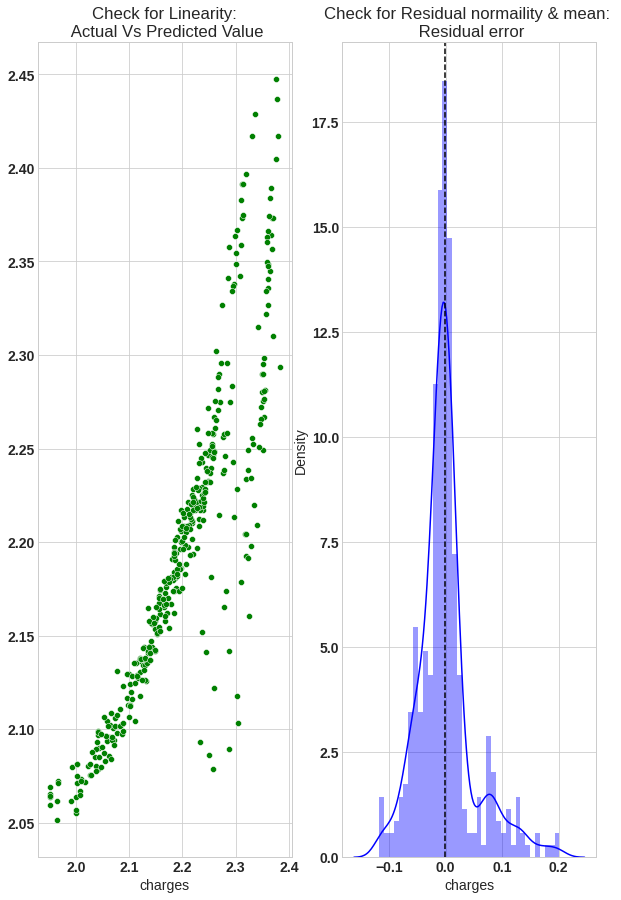

In [ ]:
f = plt.figure(figsize=(10, 15))
ax = f.add_subplot(121)
sns.scatterplot(y_test, y_pred_sk, ax = ax, color='g')
ax.set_title('Check for Linearity:\n Actual Vs Predicted Value')

ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk), ax = ax, color='b')
ax.axvline((y_test - y_pred_sk).mean(), color='k', linestyle = '--')
ax.set_title('Check for Residual normaility & mean: \n Residual error')


Text(0.5, 1.0, 'Check for Homoscedasticity: \n Residual Vs Predicted')

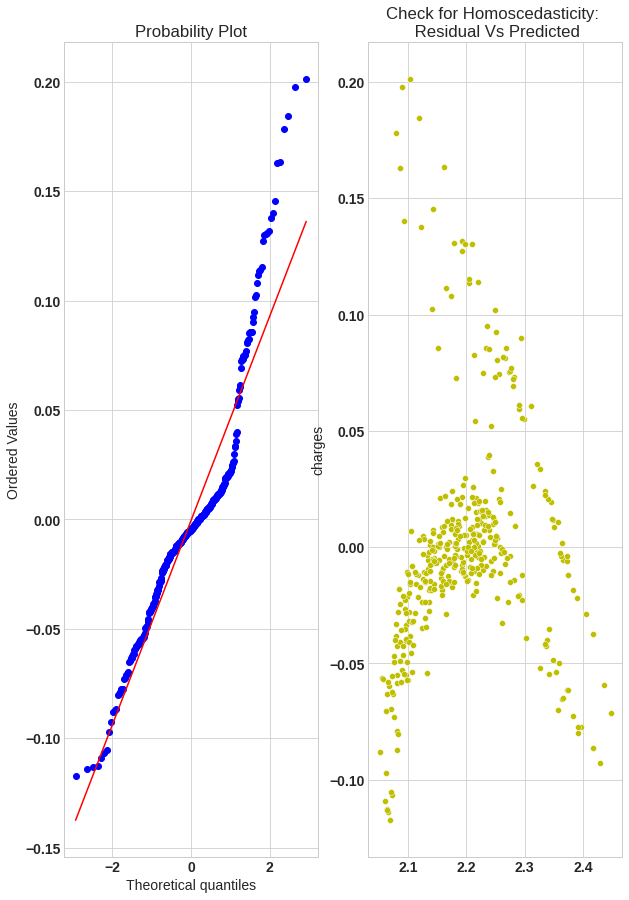

In [ ]:
# check for Multivariate Normality 
# Quantile - Quantile Plot

f, ax = plt.subplots(1, 2, figsize=(10, 15))
import scipy as sp

_,(_,_,r) = sp.stats.probplot((y_test - y_pred_sk), fit=True, plot=ax[0])

sns.scatterplot(y= (y_test - y_pred_sk), x=y_pred_sk, ax=ax[1], color='y')
ax[1].set_title('Check for Homoscedasticity: \n Residual Vs Predicted')

In [ ]:
# Check for Multicolinearity
# Variance Inflation Factor

VIF = 1/(1-R_square_sk)
VIF

4.420411832697585

The model assumption linear regression as follows

1) In our model the actual vs predicted plot is curve so linear assumption fails

2) The residual mean is zero and residual error plot right skewed

3) Q-Q plot shows as value log value greater than 1.5 trends to increase

4) The plot is exhibit heteroscedastic, error will insease after certian point.

5) Variance inflation factor value is less than 5, so no multicollearity.